Load dataset into google colab

In [ ]:
import pandas as pd

# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Biomass Gasification Dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1       

Figure out types of data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   feed                    244 non-null    object 
 1   Type of Feed            244 non-null    object 
 2   C                       244 non-null    float64
 3   H                       244 non-null    float64
 4   N                       244 non-null    float64
 5   S                       244 non-null    float64
 6   O                       244 non-null    float64
 7   ASH                     244 non-null    float64
 8   C-H Aromatics           244 non-null    int64  
 9   C-H  Alkanes            244 non-null    int64  
 10  C-O                     244 non-null    int64  
 11  C=C                     244 non-null    int64  
 12  C=O                     244 non-null    int64  
 13  O-H                     244 non-null    int64  
 14  Temp                    244 non-null    in

check for missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())

feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics             0
C-H  Alkanes              0
C-O                       0
C=C                       0
C=O                       0
O-H                       0
Temp                      0
Time                      0
BC                        0
Reactor                   0
Catalyst Type             0
Catalyst Concentration    0
CO2 mole fraction         0
H2 mole fraction          0
Hydrogen selectivity      0
CO mole fraction          0
CH4 mole fraction         0
dtype: int64


find column to represent the type of biomass feed and what types of feed are present in the dataset

In [ ]:
# Extract the biomass feed types from the second column
biomass_feed_types = df.iloc[:, 1].unique()

print("Biomass Feed Types:")
print(biomass_feed_types)

Biomass Feed Types:
['Orange Peel' 'Banana Peel' 'Watermelon Peel' 'PET' 'wheat straw'
 'Crude Glycerol' 'Dunalila salina- CGLY 4%' 'Esperolina Plantis- CGLY 4%'
 'Chulorala Valgaris- CGLY 4%' 'Dunalila salina- Dionized Water'
 'Esperolina Plantis- Dionized Water' 'Chulorala Valgaris-Dionized Water'
 'Wood' 'Black Liquor' 'Black Liquor- Wood 3%' 'Black Liqour- Wood 5%'
 'Black Liquor- Wood 7%' 'Black Liquor- Wood 3%- Formic Acid'
 'Black Liquor- Wood 5%- Formic Acid' 'Black Liquor- Wood 7%- Formic Acid'
 'Distillition Waste water' 'Dairy Waste water based on Cheese'
 'Dairy Waste water based on Milk' 'Food Waste(Kitchen)']


composition data

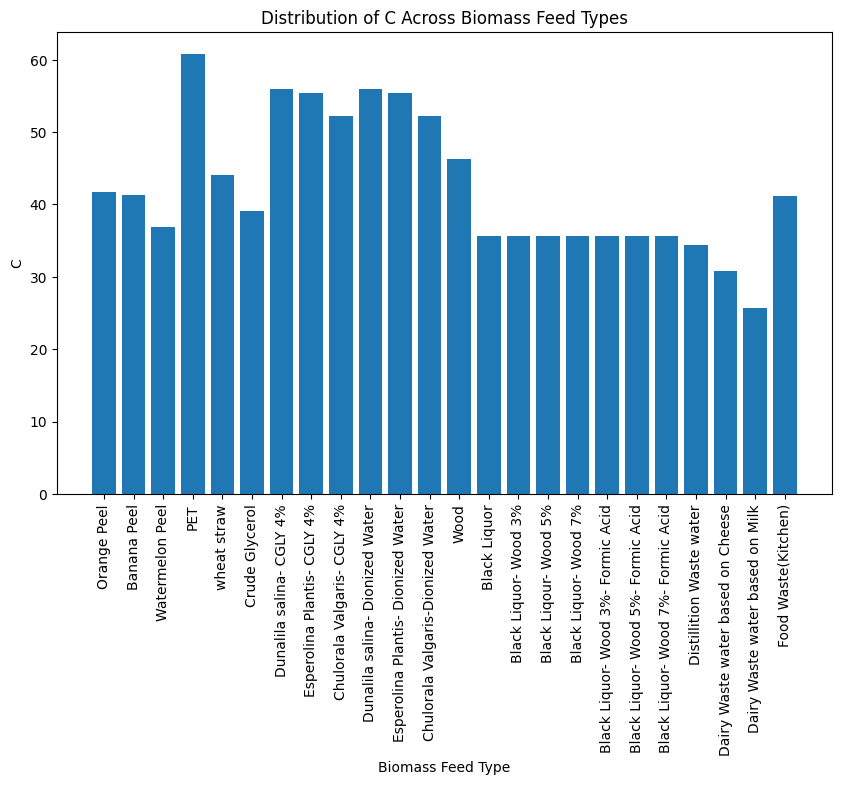

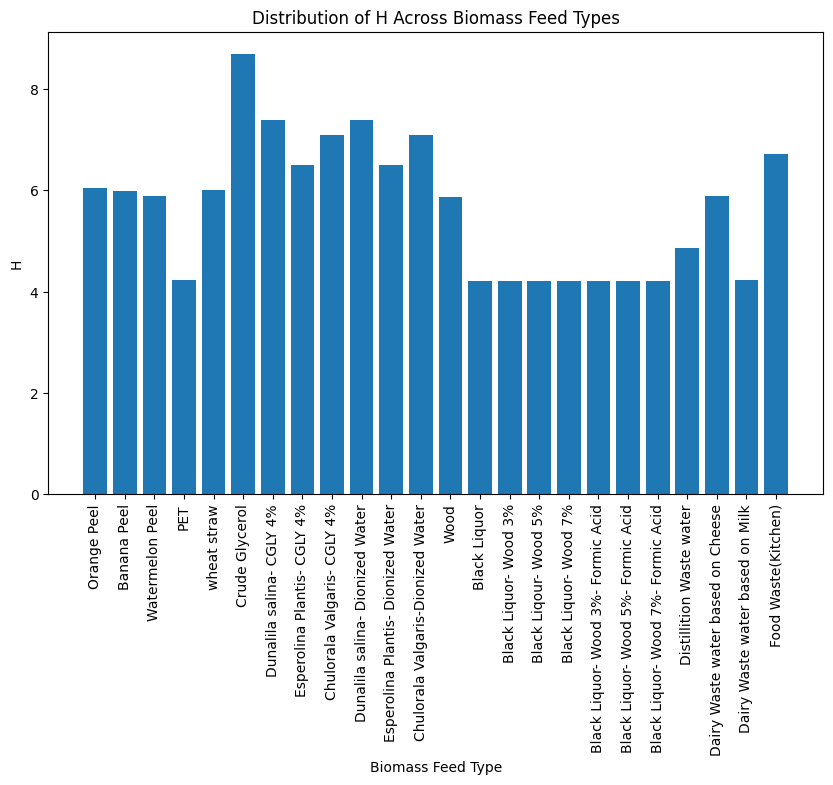

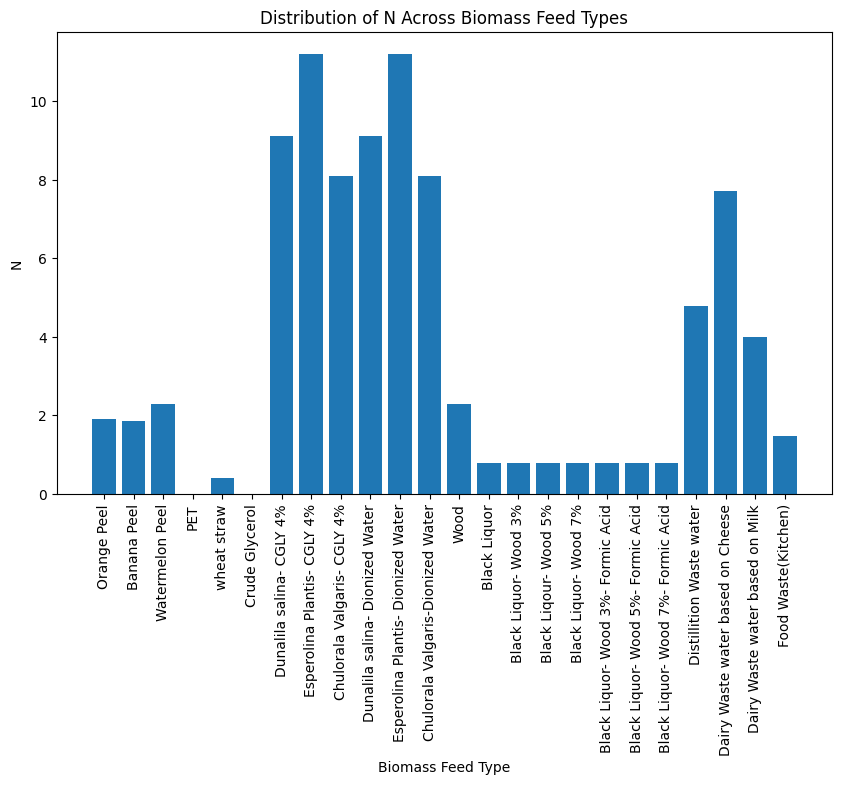

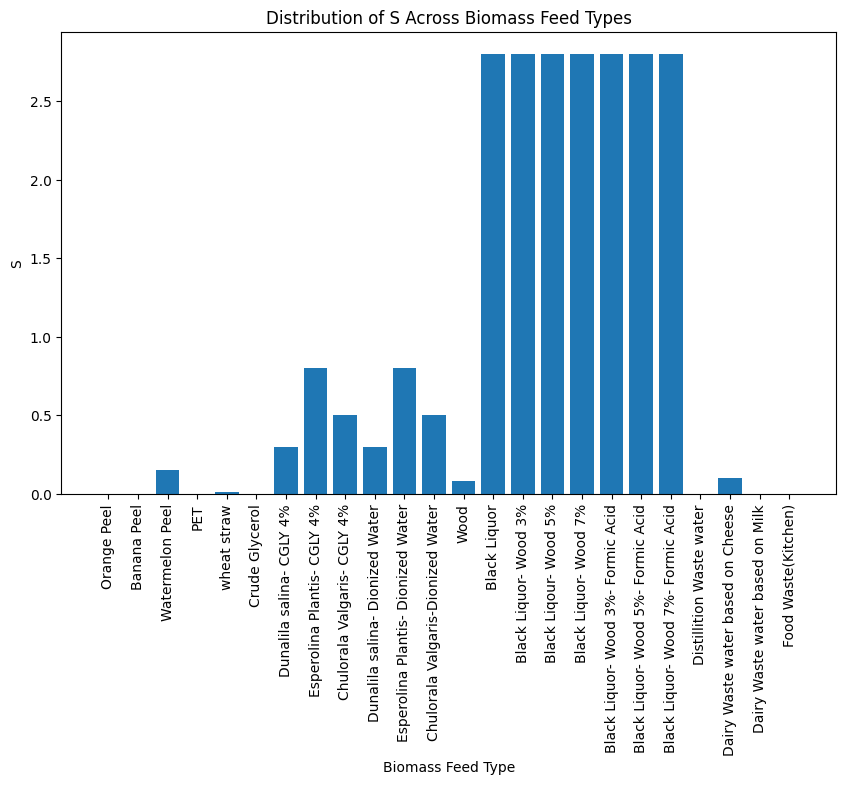

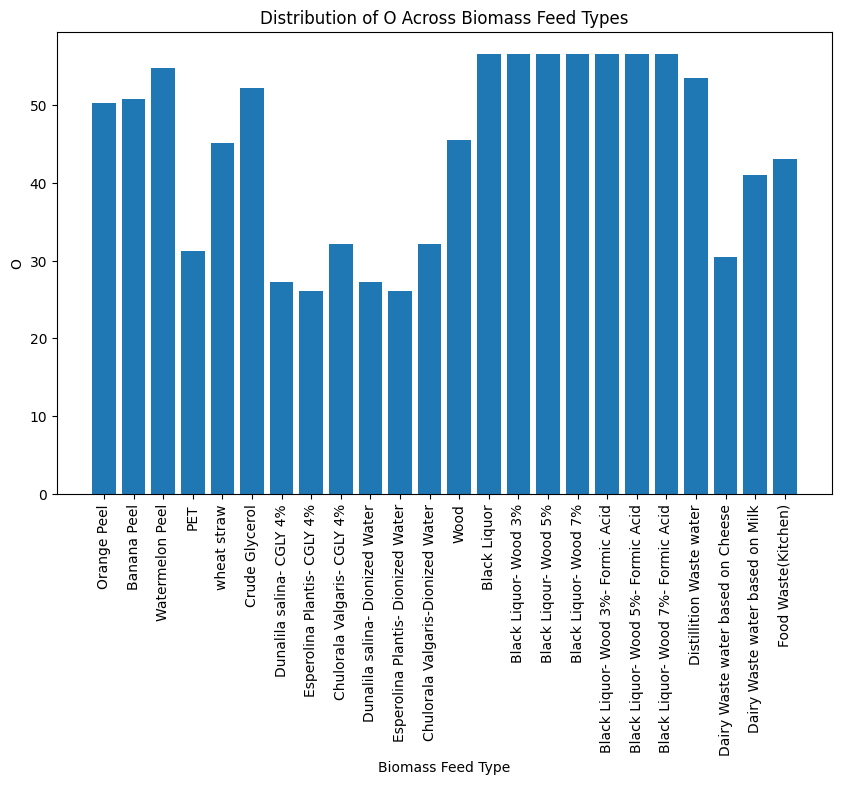

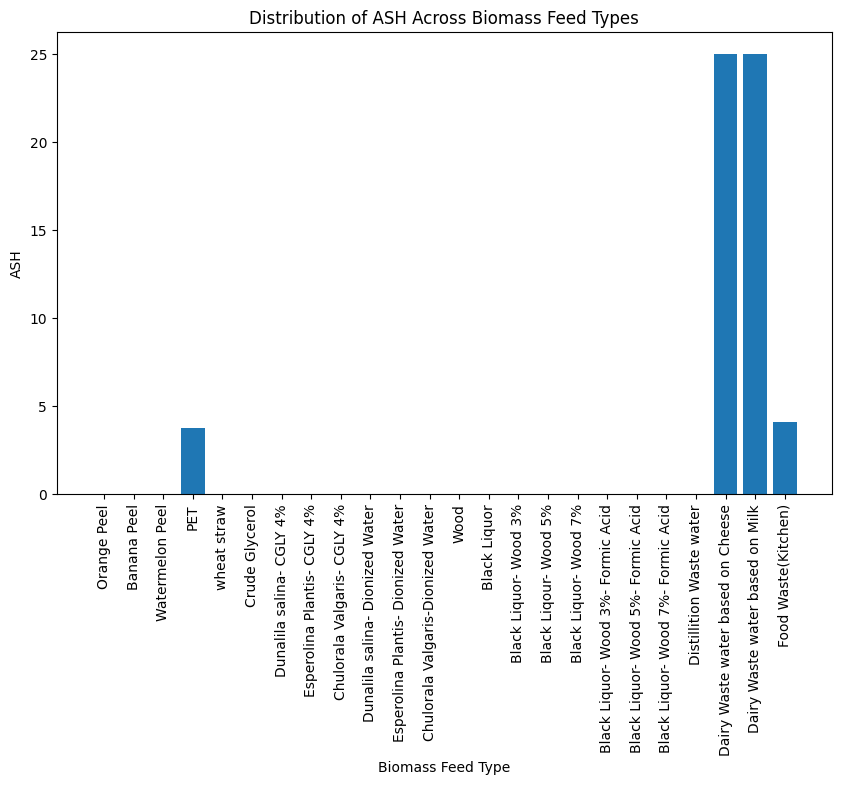

In [ ]:
import matplotlib.pyplot as plt

# Create individual bar plots for each chemical component
for component in chemical_components:
    plt.figure(figsize=(10, 6))
    plt.bar(df['Type of Feed'], df[component])
    plt.title(f'Distribution of {component} Across Biomass Feed Types')
    plt.xlabel('Biomass Feed Type')
    plt.ylabel(component)

# Rotate x-axis labels to 90 degrees
    plt.xticks(rotation=90)

    plt.show()

find temp

In [ ]:
import pandas as pd

# Assuming 'Temperature' is the column containing temperature data
min_temp = df['Temp'].min()
max_temp = df['Temp'].max()
avg_temp = df['Temp'].mean()

print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)
print("Average Temperature:", avg_temp)

Minimum Temperature: 80
Maximum Temperature: 400
Average Temperature: 369.36475409836066


are there any redundant columns?

In [ ]:
df.drop('Reactor', axis=1, inplace=True)

Create new columns for c to h and o to h ratios. what are the ranges for different feeds?

In [ ]:
# Create new columns for C/H and O/H ratios
df['C/H'] = df['C'] / df['H']
df['O/H'] = df['O'] / df['H']

# Calculate the ranges for different feeds
for feed_type in df['Type of Feed'].unique():
    c_h_range = df[df['Type of Feed'] == feed_type]['C/H'].min(), df[df['Type of Feed'] == feed_type]['C/H'].max()
    o_h_range = df[df['Type of Feed'] == feed_type]['O/H'].min(), df[df['Type of Feed'] == feed_type]['O/H'].max()
    print(f"Feed Type: {feed_type}")
    print(f"C/H Ratio Range: {c_h_range}")
    print(f"O/H Ratio Range: {o_h_range}")
    print()

Feed Type: Orange Peel
C/H Ratio Range: (6.905629139072848, 6.905629139072848)
O/H Ratio Range: (8.334437086092716, 8.334437086092716)

Feed Type: Banana Peel
C/H Ratio Range: (6.901502504173623, 6.901502504173623)
O/H Ratio Range: (8.48414023372287, 8.48414023372287)

Feed Type: Watermelon Peel
C/H Ratio Range: (6.267006802721089, 6.267006802721089)
O/H Ratio Range: (9.326530612244898, 9.326530612244898)

Feed Type: PET
C/H Ratio Range: (14.412322274881518, 14.412322274881518)
O/H Ratio Range: (7.402843601895735, 7.402843601895735)

Feed Type: wheat straw
C/H Ratio Range: (7.3500000000000005, 7.3500000000000005)
O/H Ratio Range: (7.516666666666667, 7.516666666666667)

Feed Type: Crude Glycerol
C/H Ratio Range: (4.494252873563219, 4.494252873563219)
O/H Ratio Range: (6.000000000000001, 6.000000000000001)

Feed Type: Dunalila salina- CGLY 4%
C/H Ratio Range: (7.5675675675675675, 7.5675675675675675)
O/H Ratio Range: (3.6756756756756754, 3.6756756756756754)

Feed Type: Esperolina Plantis-

convert categorical variable into a form more suitable for machine learning

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit the encoder to the "Type of Feed" column
encoder.fit(df[['Type of Feed']])

# Transform the column and create a new DataFrame
encoded_feed = encoder.transform(df[['Type of Feed']]).toarray()

# Create a new DataFrame with the encoded column
encoded_df = pd.DataFrame(encoded_feed, columns=encoder.get_feature_names_out())

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original "Type of Feed" column
df.drop('Type of Feed', axis=1, inplace=True)

find how many new columns were created

In [ ]:
# Count the number of new columns created
num_new_columns = encoded_df.shape[1]

print("Number of new columns created:", num_new_columns)

Number of new columns created: 24


handling outliers

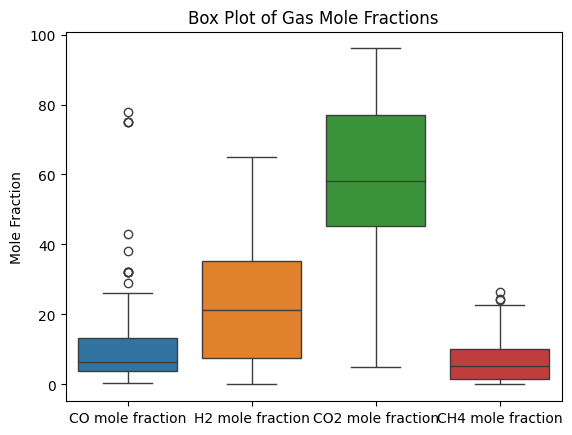

<ipython-input-12-8bb027d3b3c0>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the columns are 'CO', 'H2', 'CO2', etc.
gas_mole_fractions = ['CO mole fraction', 'H2 mole fraction', 'CO2 mole fraction', 'CH4 mole fraction']  # Replace with actual column names

# Create a box plot to visualize outliers
sns.boxplot(data=df[gas_mole_fractions])
plt.title('Box Plot of Gas Mole Fractions')
plt.ylabel('Mole Fraction')
plt.show()

import numpy as np

# Calculate the IQR for each gas mole fraction
q1 = df[gas_mole_fractions].quantile(0.25)
q3 = df[gas_mole_fractions].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the nearest value within the bounds
df[gas_mole_fractions] = df[gas_mole_fractions].where(
    (df[gas_mole_fractions] >= lower_bound) & (df[gas_mole_fractions] <= upper_bound),
    np.nan
)
df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value

plot histogram for temperature. what can you infer about the distributions of temperatures used in these experiments?

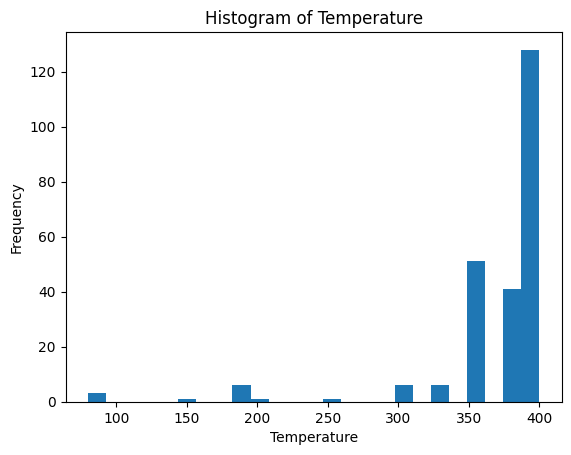

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Temp' is the column containing temperature data
plt.hist(df['Temp'], bins=25)  # Adjust the number of bins as needed
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

most of the temperatures used were over 350 degrees

 investigate the correlation between temperature and the co2 mole fraction. is there a strong relationship between these variables?

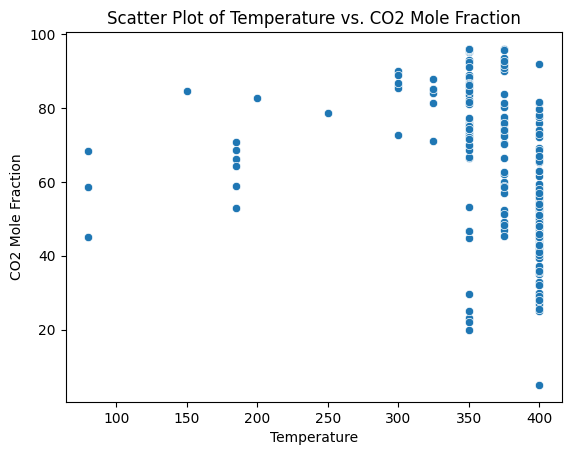

Correlation between Temperature and CO2 Mole Fraction: -0.3139426047465725


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Temp' and 'CO2 mole fraction' are the column names
sns.scatterplot(x='Temp', y='CO2 mole fraction', data=df)
plt.title('Scatter Plot of Temperature vs. CO2 Mole Fraction')
plt.xlabel('Temperature')
plt.ylabel('CO2 Mole Fraction')
plt.show()

correlation = df['Temp'].corr(df['CO2 mole fraction'])
print("Correlation between Temperature and CO2 Mole Fraction:", correlation)

thre is not a strong relationship

visualize the relationship wetween the carbon content in the feed and hydrogen selectivity. what trend do you observe?

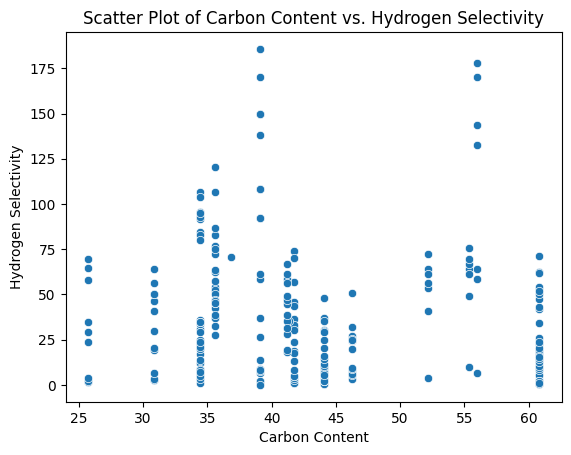

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'C' is the column for carbon content and 'Hydrogen selectivity' is the column for hydrogen selectivity
sns.scatterplot(x='C', y='Hydrogen selectivity', data=df)
plt.title('Scatter Plot of Carbon Content vs. Hydrogen Selectivity')
plt.xlabel('Carbon Content')
plt.ylabel('Hydrogen Selectivity')
plt.show()

there is not much of a trend between the two variables

plot the co mole fraciton versus the h2 mole fraction. do higher co levels correspond to lower h2 levels?

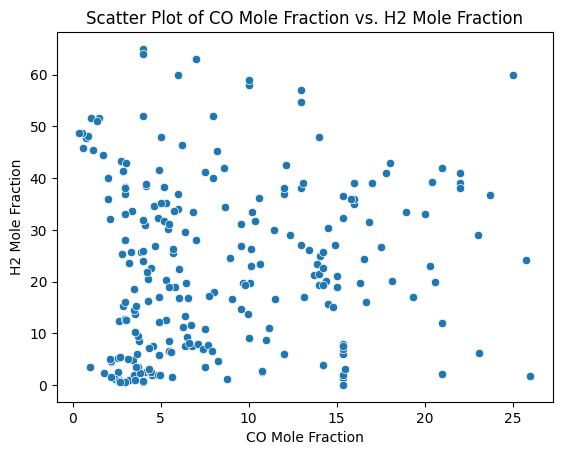

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'CO mole fraction' and 'H2 mole fraction' are the column names
sns.scatterplot(x='CO mole fraction', y='H2 mole fraction', data=df)
plt.title('Scatter Plot of CO Mole Fraction vs. H2 Mole Fraction')
plt.xlabel('CO Mole Fraction')
plt.ylabel('H2 Mole Fraction')
plt.show()

the data suggests that h2 mole fraction does decrease as co mole fraction increases

Splitting the data: split the dataset into features (X) and the target variables (Y). the y variables are co2 mole fraction, h2 mole fraction, hydrogen selectivity, co mole fraction, and ch4 mole fraction

In [ ]:
# Assuming 'CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', and 'CH4 mole fraction' are the target variable columns
target_cols = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']
X = df.drop(target_cols, axis=1)
Y = df[target_cols]